In [1]:
# ligne de code pour installe automatiquement la librairie nécessaire aux fonctions intéractives du notebook
!conda install ipywidget

In [2]:
"""
notebook 4 kmeans :
- on réalise un kmeans pour le comparer à la régression logistique
- les différents plot montrent des valeurs suspectes dans le clustering qui sont bien visibles
avec le TSNE
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%store -r data

In [3]:
# affichage des billets selon le clustering par kmeans

kmeans = KMeans(n_clusters=2).fit(data.iloc[:, 1:])

# table sans "is_genuine" poru le kmeans
table = data.iloc[:, 1:].copy(deep=True)

# ajout de la colonne "cluster_id" vide à table
table.loc[:, 'cluster_id'] = kmeans.labels_

# mise en place d’une liste de sauvegarde pour la fonction interactive plus tard
test = []

# affiche les billets selon leur cluster_id
def sort_by_cluster(table=table, cluster_list=set(table.cluster_id)):  
    for cluster in cluster_list:
        df = table[table["cluster_id"]==cluster]
        test.append(df)
        display(df)

sort_by_cluster(table)

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_id
0,171.81,104.86,104.95,4.520000,2.89,112.83,0
1,171.46,103.36,103.66,3.770000,2.99,113.09,0
2,172.69,104.48,103.50,4.400000,2.94,113.16,0
3,171.36,103.91,103.94,3.620000,3.01,113.51,0
4,171.73,104.28,103.46,4.040000,3.48,112.54,0
...,...,...,...,...,...,...,...
895,171.81,103.68,103.80,4.123536,2.98,113.82,0
919,171.92,103.68,103.45,4.198423,2.58,113.68,0
945,172.09,103.74,103.52,4.109623,3.02,112.78,0
946,171.63,103.87,104.66,4.096960,3.27,112.68,0


,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_id
591,171.67,103.81,103.76,4.590000,3.30,112.18,1
728,171.94,104.11,104.16,4.080000,3.35,111.76,1
1000,172.28,103.95,103.91,4.780000,3.31,111.40,1
1001,171.92,103.86,104.30,4.960000,3.13,111.29,1
1002,171.59,104.14,104.38,4.970000,3.47,111.22,1
...,...,...,...,...,...,...,...
1303,172.17,104.49,103.76,5.302069,2.93,111.21,1
1315,172.08,104.15,104.17,5.200358,3.40,112.29,1
1347,171.72,104.46,104.12,5.175468,3.61,110.31,1
1435,172.66,104.33,104.41,5.173450,3.56,111.47,1


In [4]:
from sklearn.metrics import adjusted_rand_score

# détermination de l’ARI pour le kmeans
ari = adjusted_rand_score(data["is_genuine"], table["cluster_id"])
print("ARI =", ari)

ARI = 0.9437384742053976


In [5]:
from ipywidgets import interact_manual

# rassemblement des tables
table = pd.concat([test[0], test[1]])

# fonction intéractive pour visualiser les clusters selon les variables
# les attributs "length" & "margin_low" permettent de mieux visualiser la séparation
@interact_manual
def show_data_byætt(att_1=table.columns, att_2=table.columns,):
    return sns.scatterplot(x=table[att_1], y=table[att_2], data=table, hue="cluster_id")

interactive(children=(Dropdown(description='att_1', options=('diagonal', 'height_left', 'height_right', 'margi…

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

# mise en place de la pca et du TSNE
pca = PCA(n_components=2).fit(normalize(data.iloc[:, 1:]))
pca_data = pca.transform(normalize(data.iloc[:, 1:]))
tsne_data = TSNE(n_components=2).fit_transform(normalize(data.iloc[:, 1:]))

print(pca.components_, "\n")
print("pca variance ratio =",pca.explained_variance_ratio_.sum())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[ 0.15063833  0.22575519  0.26762347  0.57041432  0.13264826 -0.71536865]
 [-0.26633949 -0.09243125 -0.06648231  0.80148182 -0.0388954   0.52174121]] 

pca variance ratio = 0.8573790853326111


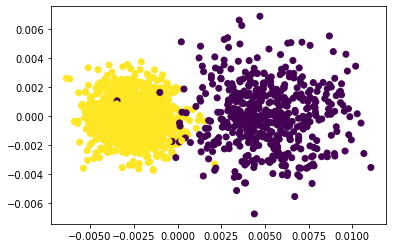

In [7]:
# PCA plot

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data["is_genuine"])

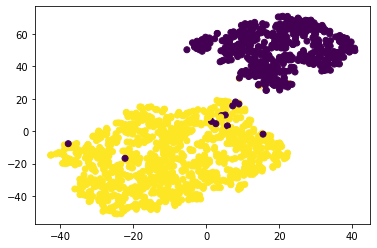

In [8]:
# TSNE plot qui permet de mieux distinguer les clusters que le pca plot
# et de voir les billets suspects

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=data["is_genuine"])